In [212]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG

In [213]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [214]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [215]:
y_train.shape

(60000,)

In [216]:
X_train.shape

(60000, 28, 28)

In [217]:
X_test.shape

(10000, 28, 28)

Train label --------------------->>> 5


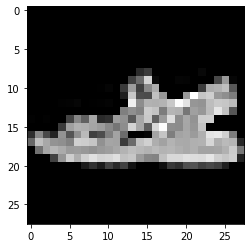

In [218]:
import matplotlib.pyplot as plt


# pick a sample to plot
sample = 1111
print("Train label --------------------->>>",y_train[sample])
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


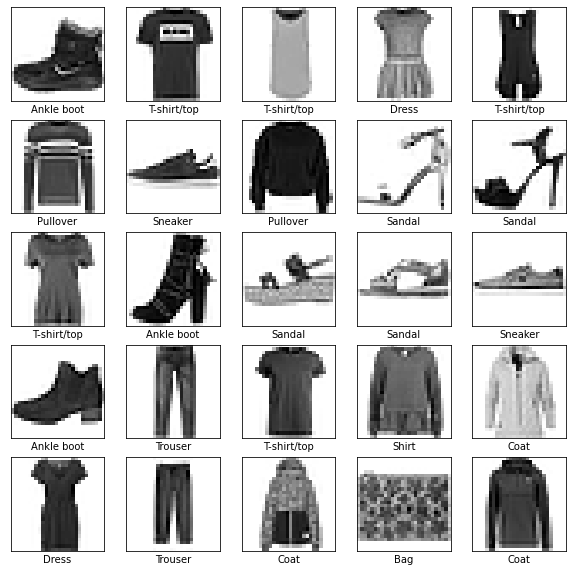

In [219]:
# Define the class names for the fashion items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [220]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [221]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [222]:
X_train=X_train.reshape((X_train.shape[0],NUM_ROWS*NUM_COLS))
X_train=X_train.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [223]:
X_train.shape

(60000, 784)

In [224]:
X_test.shape

(10000, 784)

In [225]:
from tensorflow.keras.utils import to_categorical
y_test=to_categorical(y_test,NUM_CLASSES)
y_train=to_categorical(y_train,NUM_CLASSES)

In [226]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
from keras import models
from keras.layers import Dense,Dropout

In [228]:
model=models.Sequential()
model.add(Dense(512,activation='relu',input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [229]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [230]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

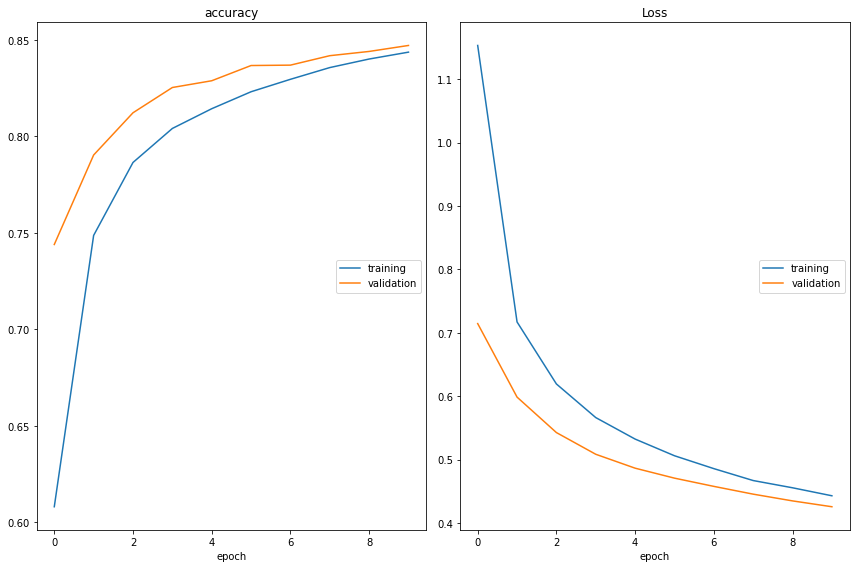

accuracy
	training         	 (min:    0.608, max:    0.844, cur:    0.844)
	validation       	 (min:    0.744, max:    0.847, cur:    0.847)
Loss
	training         	 (min:    0.443, max:    1.153, cur:    0.443)
	validation       	 (min:    0.426, max:    0.714, cur:    0.426)


In [231]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=10,
          callbacks=[plot_losses],
          verbose=0,
          validation_data=(X_test, y_test))

In [232]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42558661103248596
Test accuracy: 0.8471999764442444


In [233]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [234]:
predictions

array([[1.7263015e-05, 3.5157929e-05, 1.2919035e-05, ..., 1.7089947e-01,
        3.0034408e-03, 7.9394662e-01],
       [2.3843873e-04, 9.6719396e-06, 9.6805173e-01, ..., 1.3339702e-07,
        2.6454158e-05, 4.6001810e-07],
       [1.0692956e-05, 9.9995077e-01, 1.3766104e-06, ..., 1.0053129e-06,
        8.1635271e-08, 6.0158946e-08],
       ...,
       [2.3328215e-02, 5.6397254e-05, 1.7333656e-03, ..., 2.9974204e-04,
        9.2961460e-01, 3.5967224e-04],
       [2.4641400e-05, 9.9874240e-01, 1.8548615e-05, ..., 2.8969087e-05,
        1.0230958e-06, 7.7791137e-06],
       [1.3593514e-03, 2.2810295e-03, 1.7220144e-03, ..., 3.2303053e-01,
        4.7425043e-02, 2.7819827e-02]], dtype=float32)